<a href="https://colab.research.google.com/github/camila-marquess/analise-dataset-beer-consumption-sao-paulo/blob/master/Dataset_Beer_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **O dataset a ser analisado será o "Beer Consumption - São Paulo". O objetivo desta análise é prever a quantidade de consumo de cerveja em litros. Primeiramente, foi feita uma análise exploratória dos dados. Depois, foi feito o tratamento dos dados nulos e inserção de novas variáveis. Após isso, foi feito o modelo de regressão linear múltipla.**








# Importação das bibliotecas necessárias para a análise:




In [0]:
import pandas as pd 

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Leitura do dataset:

In [1]:
## Importante colocar seu caminho para o dataset.

df = pd.read_csv('/content/drive/My Drive/python_2/Consumo_cerveja.csv')

NameError: ignored

# **Análise Exploratória dos Dados**

# Verificando as 10 primeiras linhas do dataset:

In [0]:
df.head(10)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
5,2015-01-06,"23,78","20,1","30,5","12,2",0.0,28.218
6,2015-01-07,24,"19,5","33,7",0,0.0,29.732
7,2015-01-08,"24,9","19,5","32,8","48,6",0.0,28.397
8,2015-01-09,"28,2","21,9",34,"4,4",0.0,24.886
9,2015-01-10,"26,76","22,1","34,2",0,1.0,37.937


# Verificando o tamanho do dataset:

In [0]:
df.shape

(941, 7)

O dataset possui 941 linhas e 7 colunas.

# Neste trabalho a variável Data será desconsiderada, portanto optou-se por eliminá-la do dataset: 

In [0]:
df = df.drop(['Data'], axis=1)

In [0]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,"27,3","23,9","32,5",0,0.0,25.461
1,"27,02","24,5","33,5",0,0.0,28.972
2,"24,82","22,4","29,9",0,1.0,30.814
3,"23,98","21,5","28,6","1,2",1.0,29.799
4,"23,82",21,"28,3",0,0.0,28.900


# Verificando a quantidade de valores nulos no dataset:

In [0]:
df.isna().sum()

Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

# Verificando algumas informações do dataset:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


# Percebeu-se que as variáveis Temperatura Media (C), Temperatura Minima (C), Temperatura Maxima (C) e Precipitacao (mm) estavam no tipo string, portanto foi necessário transformá-las em float:

In [0]:
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',' ,'.').astype(float)

df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',' ,'.').astype(float)

df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',' ,'.').astype(float)

df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',' ,'.').astype(float)

# Verificando se a transformação das variáveis deu certo:

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
 7   Choveu?                      365 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.7+ KB


# Após isso, tendo em vista que todas variáveis possuíam 576 valores nulos, decidiu-se por exclui-los:

In [0]:
df = df.dropna()

# Verificando se o dataset ainda possui valores nulos:

In [0]:
df.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

Pode-se perceber que o dataset não possui mais valores nulos.

# Verificando o tamanho do dataset após excluir os valores nulos:

In [0]:
df.shape

(365, 7)

# Feature Engineering: decidiu-se por incluir uma coluna baseada na variável Precipitação na qual 1 significa que choveu e 0 significa que não choveu naquele dia.

In [0]:
#Choveu? 1-sim 0-não

df['Choveu?'] = df['Precipitacao (mm)'].apply(lambda x: 1.0 if x > 0 else 0.0)

In [0]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Choveu?
0,27.30,23.9,32.5,0.0,0.0,25.461,0.0
1,27.02,24.5,33.5,0.0,0.0,28.972,0.0
2,24.82,22.4,29.9,0.0,1.0,30.814,0.0
3,23.98,21.5,28.6,1.2,1.0,29.799,1.0
4,23.82,21.0,28.3,0.0,0.0,28.900,0.0


# Verificando algumas estatísticas do dataset:

In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperatura Media (C),365.0,21.226356,3.180108,12.900,19.020,21.380,23.280,28.860
Temperatura Minima (C),365.0,17.461370,2.826185,10.600,15.300,17.900,19.600,24.500
Temperatura Maxima (C),365.0,26.611507,4.317366,14.500,23.800,26.900,29.400,36.500
Precipitacao (mm),365.0,5.196712,12.417844,0.000,0.000,0.000,3.200,94.800
Final de Semana,365.0,0.284932,0.452001,0.000,0.000,0.000,1.000,1.000
Consumo de cerveja (litros),365.0,25.401367,4.399143,14.343,22.008,24.867,28.631,37.937
Choveu?,365.0,0.402740,0.491122,0.000,0.000,0.000,1.000,1.000


# As pessoas bebem mais no final de semana ou dia de semana? 

In [0]:
df['Consumo de cerveja (litros)'].groupby(df['Final de Semana']).agg('mean')

Final de Semana
0.0    23.998222
1.0    28.922721
Name: Consumo de cerveja (litros), dtype: float64

Resposta: O consumo médio de cerveja é maior nos finais de semana.

# Verificando o consumo de cerveja nos dias de semana e nos finais de semana por meio de um box plot:

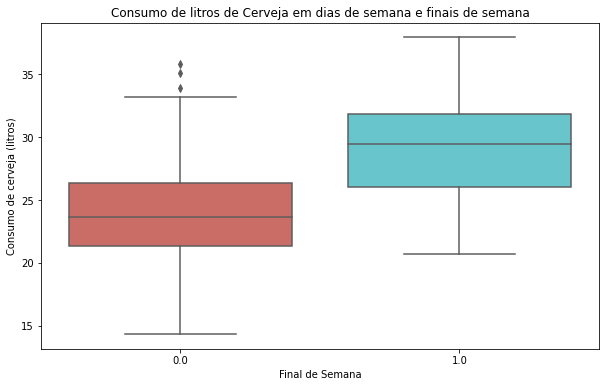

In [0]:
x = 'Final de Semana'
y = 'Consumo de cerveja (litros)'

plt.figure(figsize = (10,6))

boxplot = sns.boxplot(x=x,y=y,data=df,palette='hls')

boxplot.set_title('Consumo de litros de Cerveja em dias de semana e finais de semana')

plt.show()

Os gráficos do tipo boxplots são interessantes para comparar a distribuição de litros de cerveja pelo dia (dia de semana ou final de semana) e para verificar a presença de outliers no modelo. 

Nos dias de semana, 50% dos dados estão mais ou menos entre 20 e 27 litros de cerveja. Já nos finais de semana, 50% dos dados estão entre 25  e 33 litros.

Além disso, por meio deste gráfico, pode-se perceber que existem três outliers nos dias de semana. No código abaixo verificou-se esses outliers.

In [0]:
(
    df[(df['Final de Semana'] == 0.0) & (df['Consumo de cerveja (litros)'] > 33.5)]
)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Choveu?
19,2015-01-20,27.68,23.3,35.6,0.6,0.0,35.127,1.0
259,2015-09-17,27.26,20.4,33.0,0.0,0.0,33.930,0.0
287,2015-10-15,28.12,18.9,35.8,0.0,0.0,35.861,0.0


# Qual a média do consumo de cerveja em dias que chovem e em dias que não chovem? 

In [0]:
df['Consumo de cerveja (litros)'].groupby(df['Choveu?']).agg('mean')

Choveu?
0.0    25.929757
1.0    24.617769
Name: Consumo de cerveja (litros), dtype: float64

Resposta: Em dias que choveu, a média do consumo foi menor que nos dias que não choveu.

# Verificando a média do consumo em dias da semana e em finais de semana que estão chovendo e que não estão chovendo:

In [0]:
consumo_chuva = pd.pivot_table(df,
                       columns = 'Final de Semana',
                       index = 'Choveu?',
                       values = 'Consumo de cerveja (litros)',
                       aggfunc = 'mean')

consumo_chuva

Final de Semana,0.0,1.0
Choveu?,,
0.0,24.495261,29.621820
1.0,23.247885,27.930977


É possível perceber que tanto nos dias de semana como nos finais de semana, nos dias chuvosos o consumo médio de cerveja é menor.

# Verificando a relação linear do consumo de cerveja em dias de semana e finais de semana que está chovendo.

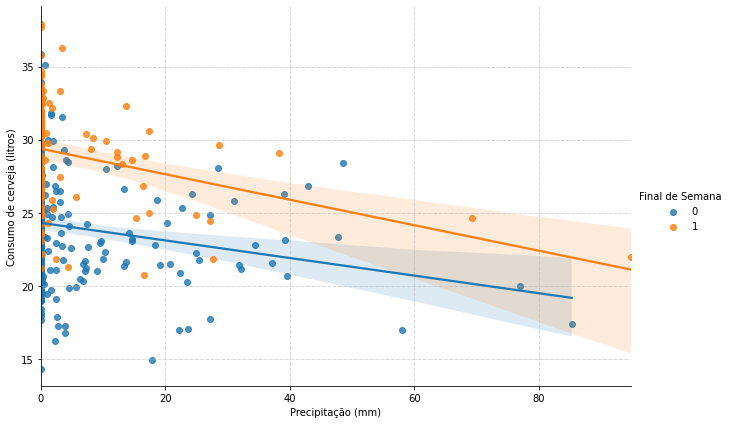

In [0]:
sns.lmplot(x='Precipitacao (mm)', y='Consumo de cerveja (litros)', hue='Final de Semana',
           data=df, aspect=1.5, height=6);

plt.xlabel('Precipitação (mm)')
plt.ylabel('Consumo de cerveja (litros)')
plt.grid(ls='-.', lw=.5);

Pode-se perceber que a relação da precipitação (mm) com o consumo de cerveja é negativa, ou seja, quanto maior a precipitação (mm), menor será o consumo de cerveja. Por meio deste gráfico de dispersão, é possível perceber que nos finais de semana, apesar da relação também ser negativa, o consumo é maior que nos dias de semana.

# Verificando o consumo de litros de cerveja em dias que choveu e dias que não choveu 

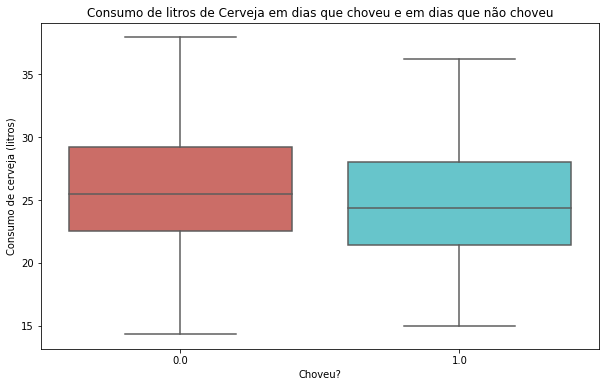

In [0]:
x = 'Choveu?'
y = 'Consumo de cerveja (litros)'

plt.figure(figsize = (10,6))

boxplot = sns.boxplot(x=x,y=y,data=df,palette='hls')

boxplot.set_title('Consumo de litros de Cerveja em dias que choveu e em dias que não choveu')

plt.show()

Em dias que não choveu, pode-se perceber que o consumo foi maior que nos dias que choveu.

# Verificando a correlação entre as variáveis:

In [0]:
df.corr(method = 'pearson')

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Choveu?
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615,-0.012409
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509,0.155332
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672,-0.138883
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784,0.510326
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981,0.013800
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000,-0.146471
Choveu?,-0.012409,0.155332,-0.138883,0.510326,0.013800,-0.146471,1.000000


Por meio dessa tabela de correlação é possível perceber que a variável a qual tem a correlação mais forte com o Consumo de cerveja (litros) é a Temperatura Máxima (C). Mas pode-se perceber também que as variáveis de temperatura têm uma correlação alta entre elas, fator que pode afetar no modelo, pois recomenda-se que as variáveis não tenham forte correlação entre elas, somente com a variável dependente (y).

# Verificando a relação de consumo de cerveja com a temperatura está média por meio de um gráfico de dispersão:

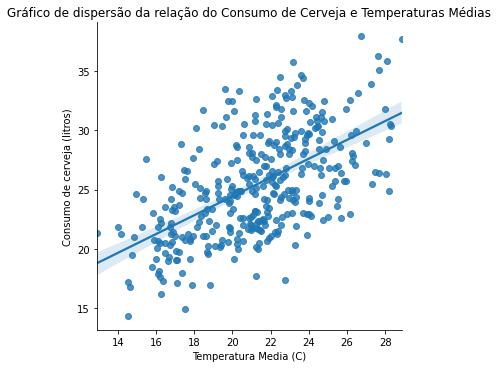

In [0]:
sns.lmplot(x = "Temperatura Media (C)", y = "Consumo de cerveja (litros)", data = df)
plt.title("Gráfico de dispersão da relação do Consumo de Cerveja e Temperaturas Médias")
plt.show()

Conforme verificado pelo coeficiente de correlação, a relação entre o consumo de cerveja e a temperatura média é positiva, ou seja, conforme a temperatura média aumenta, o consumo de cerveja também aumenta. O coeficiente foi de 0.57, podendo ser considerada uma correlação moderada. 

# E quando a temperatura está máxima? 

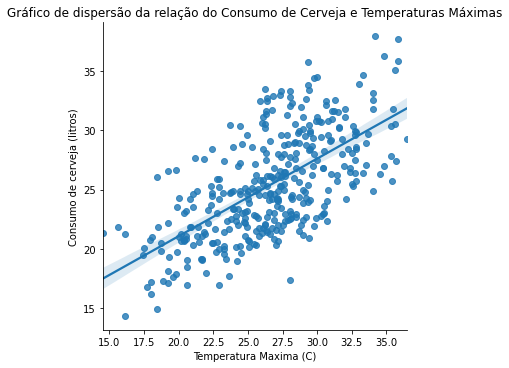

In [0]:
sns.lmplot(x = "Temperatura Maxima (C)", y = "Consumo de cerveja (litros)", data = df)
plt.title("Gráfico de dispersão da relação do Consumo de Cerveja e Temperaturas Máximas")
plt.show()

Aqui a relação também é positiva, conforme a temperatura máxima aumenta, o consumo de cerveja também aumenta. Além disso, o coeficiente de correlação foi de 0.64, podendo ser considerada uma correlação moderada entre as variáveis.

# Gráfico de correlação do consumo de ceveja quando a temperatura é mínima:

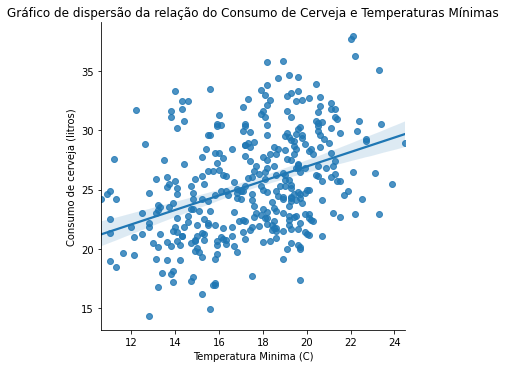

In [0]:
sns.lmplot(x = "Temperatura Minima (C)", y = "Consumo de cerveja (litros)", data = df)
plt.title("Gráfico de dispersão da relação do Consumo de Cerveja e Temperaturas Mínimas")
plt.show()

Apesar da relação entre as duas variáveis ser positiva, pode-se perceber que os dados estão bastante dispersos. O coeficiente de correlação dessas duas variáveis foi de 0.39, ou seja, apesar de ser uma relação positiva, trata-se de uma correlação baixa entre as variáveis. 

# **Aplicando o Modelo de Regressão Linear Múltipla**

# Neste dataset decidiu-se por por aplicar o modelo de regressão linear múltipla, pois o objetivo é prever a variável resposta a partir de várias variáveis explicativas (vários x). Assim sendo, a variável resposta deste modelo é Consumo de cerveja (litros), ou seja, o objetivo é prever a quantidade de consumo de cerveja a partir das variáveis explicativas. Nesse modelo, decidiu-se por incluir todas variáveis explicativas. Portanto, abaixo será definido o x do modelo:

In [0]:
x = df.drop('Consumo de cerveja (litros)',axis=1)

# Definindo o y do modelo:

In [0]:
y = df['Consumo de cerveja (litros)']

# Dividindo o dataset em base de treino e de teste. 75% será para treino e 25% para teste:

In [0]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25,random_state=42)

# Verificando os shapes dos datasets de treino e teste.

In [0]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(273, 6) (273,)
(92, 6) (92,)


# Treinando o Modelo de Regressão Linear Múltipla:

In [0]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.18927666, -0.12450782,  0.58663292, -0.05800596,  5.16444987,
        0.37681088])

# Verificando os pesos das variáveis no modelo:

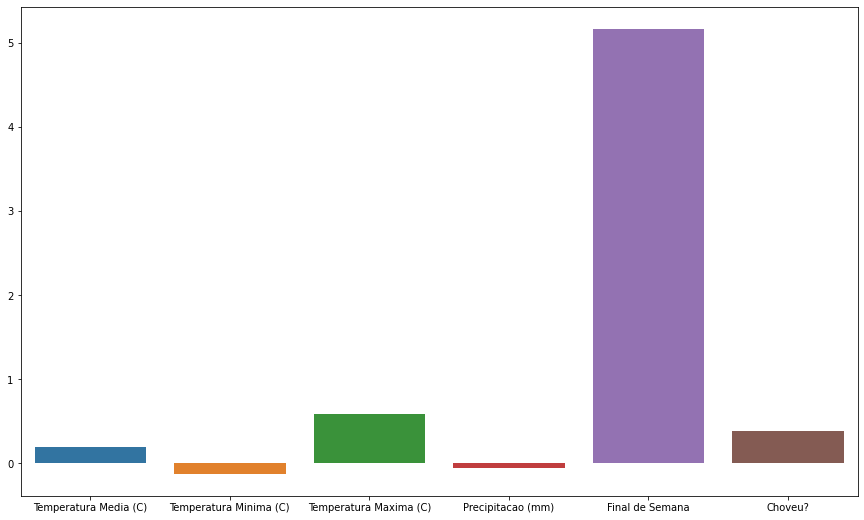

In [0]:
plt.figure(figsize=(15,9))
sns.barplot(x = x_train.columns,y = lr.coef_)
plt.show()

Pode-se perceber que a variável que tem o maior peso sobre a variável resposta é Final de Semana, ou seja, a variação entre dia de semana e final de semana influencia muito o consumo de cerveja. Além disso, as variáveis Temperatura Mínima (C) e Precipitação (mm) têm um peso negativo sobre a variável y.

# Verificando a Média dos Erros ao Quadrado:

In [0]:
y_pred = lr.predict(x_test)

mean_squared_error(y_test,y_pred)

5.7536903080703015

# Raiz quadrada aplicada à Média dos Erros ao Quadrado, para trazer a métrica para a mesma magnitude do eixo y.

In [0]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.3986851206588793

Tendo em vista que a média do consumo de cerveja é de 25.40 litros, pode-se considerar que o erro é aceitável. O modelo está errando 2.39 litros para cima e para baixo.

# Verificando o coeficiente de determinação (R²) do modelo:

In [0]:
lr.score(x_test,y_test)

0.7446236565419468

Por meio do coeficiente de determinação, pode-se dizer que aproximadamente 74% do modelo explica o consumo de cerveja.

# Verificando o modelo no dataset de treino:

In [0]:
y_pred_train = lr.predict(x_train)
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(lr.score(x_train,y_train))

5.233514969664926
2.2876876905873593
0.7085589493630273


Analisando o dataset de treino, pode-se perceber que o modelo explica 70% da variação do consumo de cerveja, o R² foi menor que no dataset de teste.

# Plotando os erros do modelo:

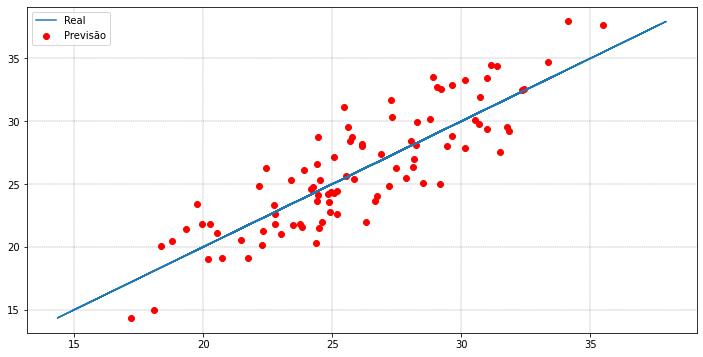

In [0]:
def graficos(y, pred):
    
    plt.figure(figsize=(12, 6))

    plt.plot(y,y)
    plt.scatter(pred,y, c='r', marker='o')
    plt.legend(['Real','Previsão'])
    plt.grid(ls='-.', lw=0.2, c='k');

graficos(y_test, y_pred)

# Tendo em vista que a variável Temperatura Mínima (C) tem uma correlação alta com Temperatura Média (C), e que Precipitação (mm) tem uma correlação alta com a variável que verifica se choveu, decidiu-se por aplicar outro modelo neste dataset, desta vez excluindo as variáveis Temperatura Mínima (C), Temperatura Média (C) e Choveu?.

# Definindo o x do modelo:

In [0]:
x = df.drop(['Consumo de cerveja (litros)', 'Temperatura Media (C)', 'Temperatura Minima (C)','Choveu?'], axis=1)

# Definindo o y do modelo: 

In [0]:
y = df['Consumo de cerveja (litros)']

# Dividindo o dataset em treino e teste:

In [0]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.25,random_state=42)

# Aplicando o Modelo de Regressão Linear Múltipla:

In [0]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 0.65295463, -0.05081594,  5.18612642])

# Verificando a Média dos Erros ao Quadrado:

In [0]:
y_pred = lr.predict(x_test)

mean_squared_error(y_test,y_pred)

5.652562093305645

# Aplicando a raiz quadrada na Média dos Erros ao Quadrado:

In [0]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.377511744094158

Pode-se perceber que a diferença entre os dois modelos foi muito baixa, mesmo excluindo as variáveis que têm alta colinearidade.

# Verificando o coeficiente de determinação do modelo:

In [0]:
lr.score(x_test,y_test)

0.749112211247579

Assim como o primeiro modelo, este explica, aproximadamente, 74% do consumo de cerveja.

In [0]:
## avaliação no treino

y_pred_train = lr.predict(x_train)
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(lr.score(x_train,y_train))

5.251882579170597
2.2916986231113805
0.7075361042115278


# **Conclusões:**

* Analisando o dataset, foi possível perceber que o consumo médio de cerveja é maior nos finais de semana. 

* Além disso, em dias que chovem o consumo médio de cerveja foi menor, tanto nos dias de semana quanto nos finais de semana. 
Precipitação (mm) tem uma relação linear negativa com a variável target, ou seja, quanto maior a precipitação, menor será o consumo de cerveja. 

* Ainda, por meio da tabela gerada das correlações entre as variáveis explicativas e a variável resposta, foi possível perceber que a correlação mais forte com a variável y – Consumo de Cerveja – foi a variável Temperatura Máxima. Porém, percebeu-se também que as variáveis de temperatura tinham uma correlação forte entre elas, e é importante mencionar que a colinearidade (alta correlação entre as variáveis explicativas) não é interessante para um modelo de regressão linear, pois ele pode ficar enviesado. 

* Ao aplicar o modelo de regressão linear múltipla, foi possível perceber que a variável que possuía maior peso dentro do modelo era a variável Final de Semana. 

* Decidiu-se por treinar o modelo duas vezes: na primeira considerando todas as variáveis explicativas e na segunda, desconsiderando as variáveis explicativas que possuíam alta colinearidade. Nos dois modelos, o erro foi muito próximo, de aproximadamente 2,39 litros para cima e para baixo. Vale mencionar que, em razão da média do consumo de cerveja ser de 25,4 litros, um erro de 2,39 é considerado baixo. 

* Por fim, é importante mencionar que nos dois modelos o coeficiente de determinação – coeficiente que informa o quanto que x está explicando a variação de y – foi de 74%, ou seja, os modelos explicam 74% da variação do consumo de cerveja.   
